# Multiple Linear Regression
## Specifically, Polynomial Regression
## Example using Time to Predict Ball Height
### CIT 3100
### Stephen Walsh

Load in the necessary Python libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

The basketball time and height data is available [here](https://drive.google.com/file/d/1bb0sieqTjUyZdMfDBEQjI44SRxlXs_Hy/view?usp=sharing). Read in the dataset (in .csv format), and plot the data. Remember to download and then upload the SpeedMileage.csv file to Google Colab before you begin.

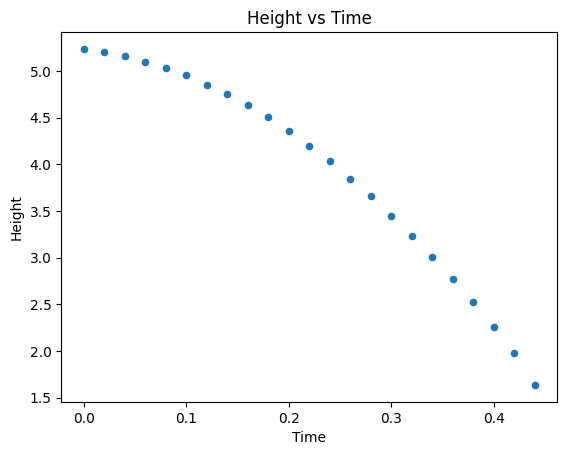

In [ ]:
# Dataset from https://cs.franklin.edu/~sieberth/MATH160/bookFiles/Chapter3/333371_0307_317-323.pdf, Example 2
# Python Code partially developed with help from this site: https://data36.com/polynomial-regression-python-scikit-learn/
bball_csv = pd.read_csv("/content/BasketballDrop.csv")
x = bball_csv.Time
y = bball_csv.Height

df = pd.concat([x, y], axis=1)
df.columns = ['x', 'y']

df.plot.scatter(x="x",y="y", title="Height vs Time")
plt.xlabel("Time")
plt.ylabel("Height")

plt.show()

<font color=red> Add an appropriate title and plot axes above! </font>The relationship between speed and mileage seems to be roughly quadratic (it forms a parabola).

That looks better (more linear)! When we fit a regression model using the `sklearn` package, you may need to `reshape` the x and y values to be one-dimensional columns. Let's do that now.

In [ ]:
# The proper shaped array is an input requirement for the linear model
# reshaping is usually an issue when using 1 x variable
x = np.array(x).reshape(-1,1) # (-1,1) allows you to reshape to a single column

## Build and fit the linear regression model!

In [ ]:
# Build and fit polynomial regression model
# Fit our modeling using speed (x), speed^2 (x^2) and mileage (y)
poly = PolynomialFeatures(degree=2, include_bias=False)

# capital X contains both x and x^2 as predictors
X = poly.fit_transform(x)

model = LinearRegression()
model.fit(X, y)

# Interpret these coefficients!
[model.intercept_,model.coef_]

[5.2340463667556705, array([ -1.30176512, -15.44916287])]

Notice that now we have <font color ="orange">three</font> coefficients: $b_0, b_1,b_2$. They relate to the model as the y-intercept (overall bias correction), how the speed linear relates to mileage, and how the speed quadratically relates to mileage, respectively.

## Get predictions for $Y$ and a measure of model performance ($R^2$)

In [ ]:
# Get our r2 value and round it to 3 decimals. How much variance is explained?
# Get our predicted y values for x (this will create the line of best fit)
y_predicted = model.predict(X)
r2 = round(model.score(X,y), 3)
r2

1.0

So, when I ran this, I got <font color=red>1.0. This means that 100%</font> of the variability in the data can be explained by the model. That's a lot! So the score for the model is good.

# Diagnosing Regression Model Fit (Checking Model Assumptions)

## 0) Is there a linear relationship between X and Y?
We checked this earlier with a scatter plot, so this is all set.

## 1) Are the residuals approximately normally distributed?
We can look at a histogram of the residuals and see if it is roughly bell-shaped (normal).

(array([1., 0., 0., 0., 0., 4., 8., 7., 1., 2.]),
 array([-0.03631065, -0.0309131 , -0.02551554, -0.02011799, -0.01472043,
        -0.00932287, -0.00392532,  0.00147224,  0.00686979,  0.01226735,
         0.0176649 ]),
 <BarContainer object of 10 artists>)

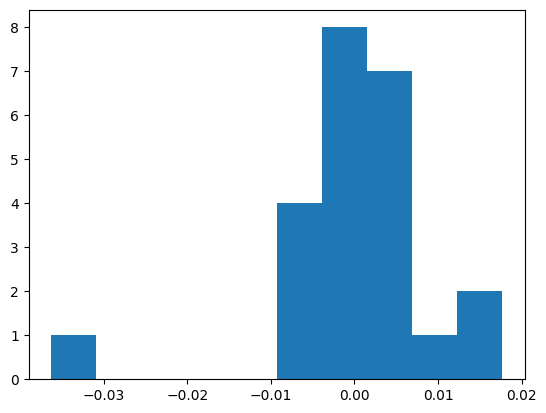

In [ ]:
# histogram of residuals
resid = y - y_predicted
plt.hist(resid)

## 2) Check independence of residuals

We can check this with a "fitted vs residual" scatter plot. That is, predicted Y's compared to the residuals.

## 3) Check constant variance of residuals

We can use the same "fitted vs residual" scatter plot to check for constant variance.

Text(0, 0.5, 'residual')

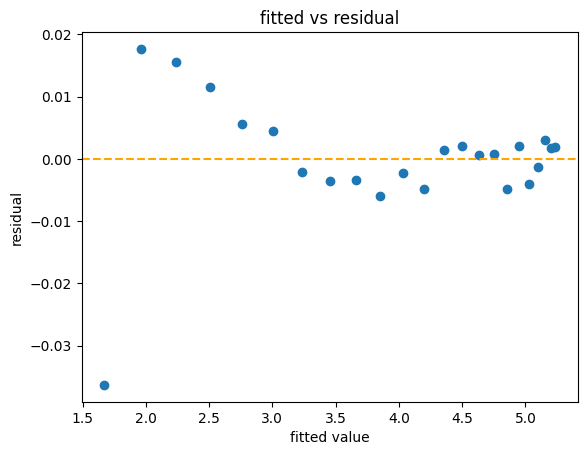

In [ ]:
plt.scatter(y_predicted, resid)
# plt.plot(np.repeat(0, df.index.max()), color='darkorange', linestyle='--')
plt.axhline(0, color = "orange", linestyle = "--")
plt.title("fitted vs residual")
plt.xlabel("fitted value")
plt.ylabel("residual")

<font color=red> Does it look like the assumptions of the model are satisfied? Explain your answer.</font>

When the vallues are superior to 2 it is closer to reach the predicted value of the time.

# Scatter plot with our regression line

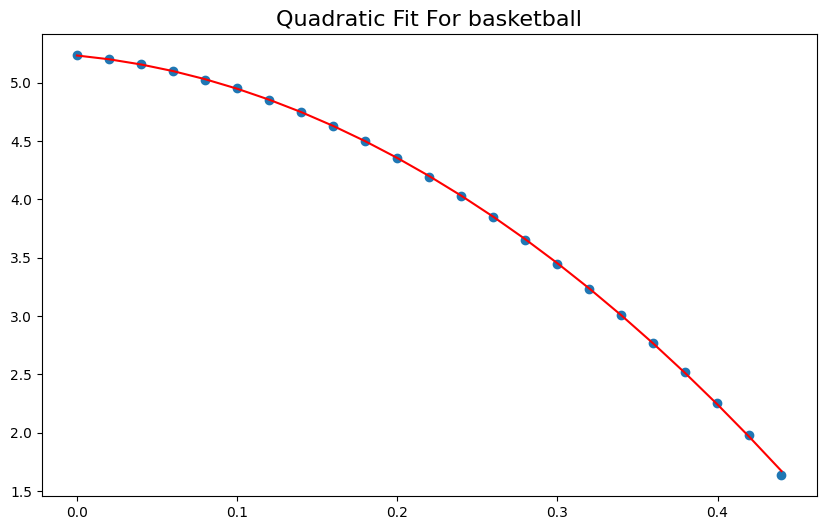

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Quadratic Fit For basketball", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()

## <font color="orange">From this study, how can we predict what time the ball will hit the ground? That is, for what $X$ do we predict that $Y$ is zero?</font>

In [ ]:
xpred = np.arange(start=0.0,step=0.01,stop=0.7).reshape(-1,1)
Xpred = poly.fit_transform(xpred)
y_pred_fine = model.predict(Xpred)
time_zero_height = xpred[abs(y_pred_fine) == abs(y_pred_fine).min()]
time_zero_height

array([[0.54]])

Looks like the basketball will hit the ground at <font color="red"> 0.54
 seconds. </font>